# Predicting if MLB Pitchers will get Injured
B7 - Fan Yang, Hunter Fristick, Nathan Quint



## Load Performance Data

In [ ]:
import pandas as pd
url="https://drive.google.com/file/d/1gVK-eB8V7t4G6Osp90BgLTNRI5EhsI10/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

C:\Users\potat\AppData\Local\Temp\ipykernel_31788\1187563446.py:4: DtypeWarning: Columns (0,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,Team,Season,Name,DL_length,team_id,player_id,Age,W,L,ERA,...,wSL_C_pi,wXX_C_pi,O_Swing_pct_pi,Z_Swing_pct_pi,Swing_pct_pi,O_Contact_pct_pi,Z_Contact_pct_pi,Contact_pct_pi,Zone_pct_pi,Pace_pi
0,Nationals,2006,Ryan Drese,15,WAS,dresr001,30,0,2,5.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Royals,2006,Runelvys Hernandez,15,KCA,hernr003,28,6,10,6.48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cubs,2006,Kerry Wood,15,CHN,woodk002,29,1,2,4.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cubs,2006,Mark Prior,15,CHN,priom001,25,1,6,7.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Phillies,2006,Chris Booker,15,PHI,bookc001,29,0,0,9.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['DL_length'] = df['DL_length'].replace(15, 1)
df['DL_length'] = df['DL_length'].replace(60, 1)
df['DL_length'] = df['DL_length'].replace(7, 1)
df['DL_length'] = df['DL_length'].replace(10, 1)

<AxesSubplot:xlabel='Season', ylabel='Density'>

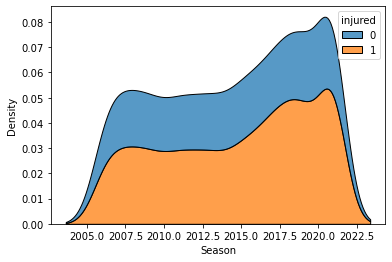

In [ ]:
df.rename(columns={'DL_length': 'injured'}, inplace=True)
import seaborn as sns
sns.kdeplot(data=df, x="Season", hue="injured", multiple="stack")


## Past surgery data

In [ ]:
url='https://drive.google.com/file/d/11yOwoL6xv_3T9d2h06fq-PaARlXVSKfK/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
tmj = pd.read_csv(url)
tmj

,Player,TJ Surgery Date,Team,Level,Position,Throws,Country,High School,College(s),Age,...,IP,K-BB%,ERA-,FIP-,G.1,GS.1,IP.1,K-BB%.1,ERA-.1,FIP-.1
0,Bryce Harper,11/23/2022,PHI,MLB,OF,R,United States,Nevada,Southern Nevada,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tyler Matzek,10/12/2022,ATL,MLB,P,L,United States,California,NaN,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Scott Effross,10/1/2022,NYY,MLB,P,R,United States,Ohio,Indiana,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Shane Baz,9/28/2022,TB,MLB,P,R,United States,Texas,NaN,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Anthony Gose,9/14/2022,CLE,MLB,P,L,United States,California,NaN,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,Tom Candiotti,10/13/1981,MIL,AA,P,R,United States,California,St. Mary's of California,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2258,Bill Bordley,4/13/1981,SF,MLB,P,L,United States,California,"El Camino, USC",23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2259,Joe Hesketh,1/1/1981,WAS,AA,P,L,United States,New York,State of New York,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260,Brent Strom,1/1/1978,SD,MLB,P,L,United States,California,"San Diego City, USC",28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tmj=tmj[["Player","TJ Surgery Date"]]
tmj

,Player,TJ Surgery Date
0,Bryce Harper,11/23/2022
1,Tyler Matzek,10/12/2022
2,Scott Effross,10/1/2022
3,Shane Baz,9/28/2022
4,Anthony Gose,9/14/2022
...,...,...
2257,Tom Candiotti,10/13/1981
2258,Bill Bordley,4/13/1981
2259,Joe Hesketh,1/1/1981
2260,Brent Strom,1/1/1978


In [ ]:
tmj=tmj.rename(columns={"Player":"Name","TJ Surgery Date":"Season"})
tmj['Past surgery'] = "1"
tmj['Season']=tmj["Season"].str.strip().str[-4:]
tmj['Season']=tmj['Season'].astype(str).astype(int)
tmj

,Name,Season,Past surgery
0,Bryce Harper,2022,1
1,Tyler Matzek,2022,1
2,Scott Effross,2022,1
3,Shane Baz,2022,1
4,Anthony Gose,2022,1
...,...,...,...
2257,Tom Candiotti,1981,1
2258,Bill Bordley,1981,1
2259,Joe Hesketh,1981,1
2260,Brent Strom,1978,1


## String Matching

In [ ]:
df['tommy_j'] = 0

In [ ]:
#string matching to combine both datasets together
for index, row in tmj.iterrows():
    
    player = tmj['Name'][index]
    surgery_year = tmj['Season'][index]
    player_match = df.loc[df['Name'] == player]
    matches = player_match.loc[player_match['Season'] >= surgery_year]
    
    for idx in matches.index:
        
        df['tommy_j'][idx] = 1

C:\Users\potat\AppData\Local\Temp\ipykernel_31788\3997534316.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tommy_j'][idx] = 1


In [ ]:
df.rename(columns={'tommy_j': 'past_surgery'}, inplace=True)
df.sample(10)


,Team,Season,Name,injured,team_id,player_id,Age,W,L,ERA,...,wXX_C_pi,O_Swing_pct_pi,Z_Swing_pct_pi,Swing_pct_pi,O_Contact_pct_pi,Z_Contact_pct_pi,Contact_pct_pi,Zone_pct_pi,Pace_pi,past_surgery
2176,Rangers,2011,Mason Tobin,1,TEX,tobim001,23,0,0,6.75,...,0.00,0.177,0.619,0.376,0.889,0.923,0.914,0.452,23.2,1
725,0,2007,Ramon Ortiz,0,0,0,34,5,4,5.45,...,-10.87,0.389,0.646,0.480,0.810,0.863,0.835,0.355,6.2,0
3037,Angels,2013,Tommy Hanson,0,ANA,hanst001,26,4,3,5.42,...,0.00,0.260,0.583,0.418,0.655,0.893,0.817,0.490,24.9,0
6226,Nationals,2019,Kyle Barraclough,1,WAS,barrk002,29,1,2,-0.80,...,0.00,0.261,0.662,0.452,0.536,0.794,0.716,0.476,0.0,0
8210,0,2021,Ryan Hendrix,0,0,0,26,5,1,-0.40,...,0.00,0.235,0.616,0.406,0.429,0.799,0.680,0.448,0.0,0
7801,Pirates,2021,Duane Underwood Jr.,1,PIT,NaN,26,2,3,0.10,...,0.00,0.249,0.637,0.448,0.552,0.859,0.776,0.512,0.0,0
1543,0,2009,CC Sabathia,0,0,0,28,19,8,3.37,...,0.00,0.287,0.646,0.476,0.601,0.836,0.769,0.526,25.3,0
4782,0,2016,Andrew Faulkner,0,0,0,23,0,0,6.75,...,0.00,0.200,0.766,0.504,0.909,0.898,0.900,0.538,19.5,0
2569,Pirates,2012,Chris Leroux,1,PIT,leroc001,28,0,0,5.56,...,0.00,0.425,0.653,0.532,0.556,0.871,0.738,0.473,25.5,0
1119,0,2008,Scott Baker,0,0,0,26,11,4,3.45,...,0.00,0.344,0.671,0.531,0.700,0.852,0.810,0.572,23.9,0


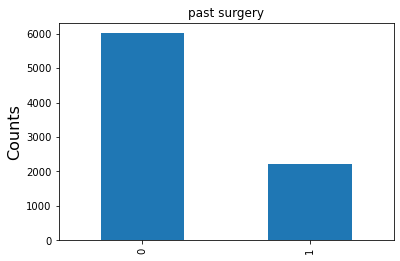

In [ ]:
df.past_surgery.value_counts()
import matplotlib.pyplot as plt
past_surgery=["1","0"]
df.past_surgery.value_counts().plot(kind='bar', title='past surgery')
plt.ylabel('Counts', fontsize=16)
plt.show()

## Feature importance


In [ ]:
df_1=df.rename(columns={"inLI":"start average LI",
                        "pos_WPA":"Win Probability Added",
                        "G":"Game played",
                        "FBv":"Fast ball velocity",
                        "Pulls":"Pull hitter",
                        "pLI":"Averge LI",
                        "vFC_pfx":"Cutter",
                        "GS":"Game started",
                        "TBF":"Total Batters Faced",
                        "K_pct":"Strikeout percentage",
                        "exLI":"exist average LI",
                        "ERA":"Earned run average",
                        "SF_pct":"sacrifice fly percentage",
                        "Contact_pct":"Contact Rate",
                        "CU_X_pi":"Curve ball index",
                        "SL_X_pfx":"Slider pfx",
                        "wCH_C_pfx":"Changeup pfx",
                        "SO":"Strikeouts counts",
                        "FA_X_pfx":"Fast ball pfx"})

In [ ]:
df_2=df_1.drop(["Name","Team","team_id","player_id","Dollars","Age_Rng"],axis=1)

In [ ]:
### select features that have high importance level 
#split dataset with train,test,validation set based on Seasons
train = df_2[df_2['Season'] <= 2019]
validation= df_2[(df_2["Season"] == 2020)]
test= df_2[df_2["Season"]==2021]
#define X and Y
X_train=train.drop(['injured',"Season"], axis = 1)
X_test=test.drop(['injured',"Season"], axis = 1)
X_vali=validation.drop(['injured',"Season"], axis = 1)
Y_train=train['injured']
Y_test=test['injured']
Y_vali=validation['injured']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_train,Y_train)
predictionforest = trainedforest.predict(X_vali)
X=df_2.drop(['injured',"Season"], axis = 1)

<AxesSubplot:>

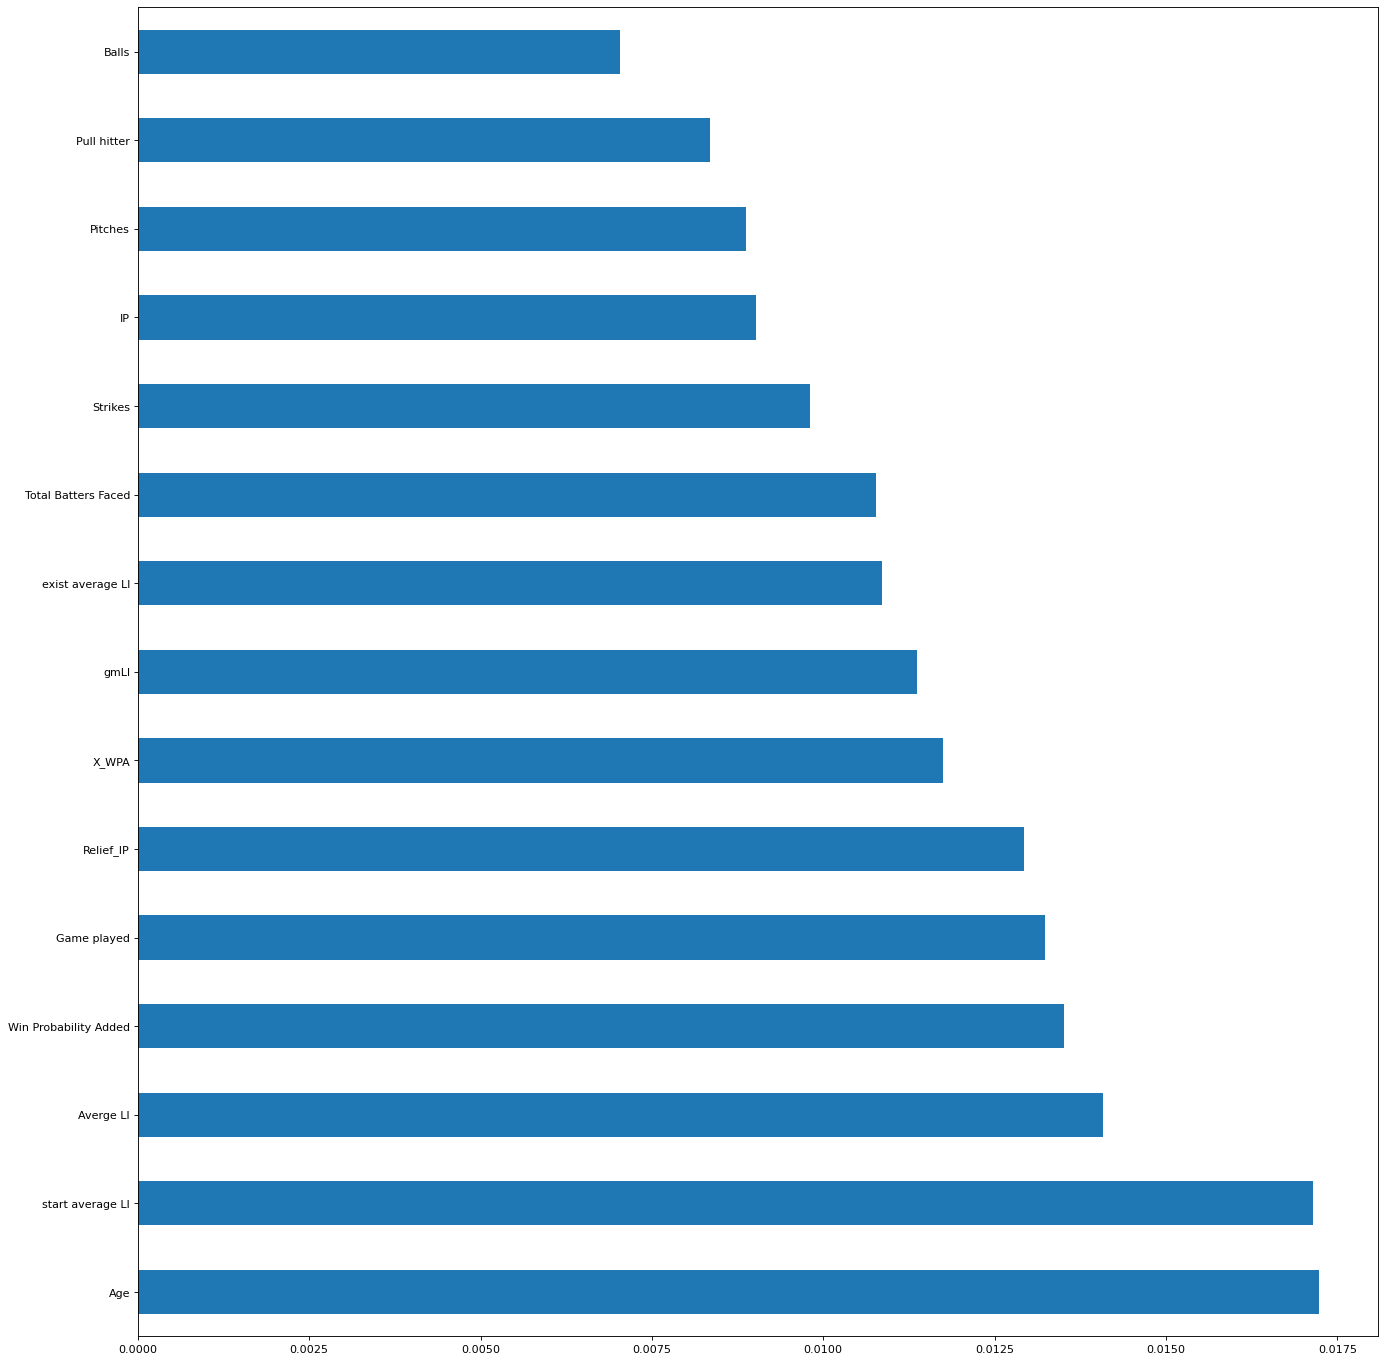

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = XGBClassifier().fit(X_train, Y_train)
predictions = xgb_model.predict(X_vali)
actuals = Y_vali

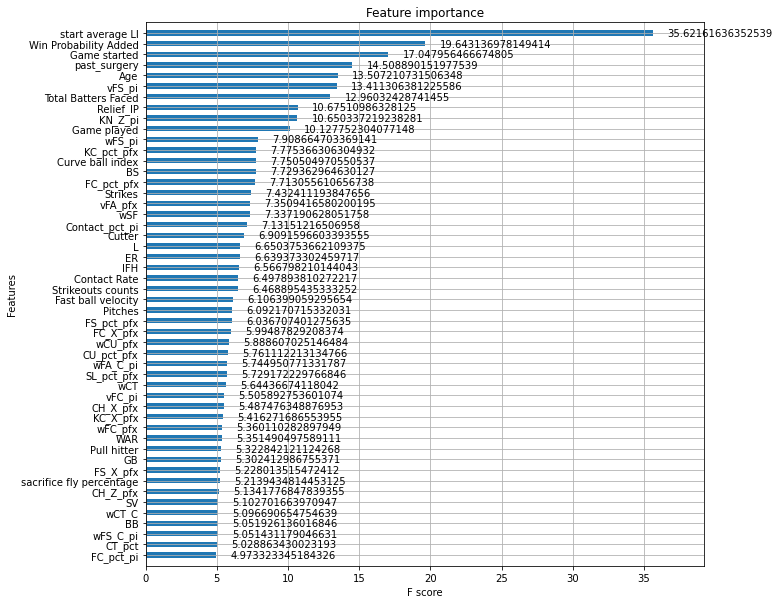

In [ ]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.5, ax=ax,importance_type='gain')
plt.show()

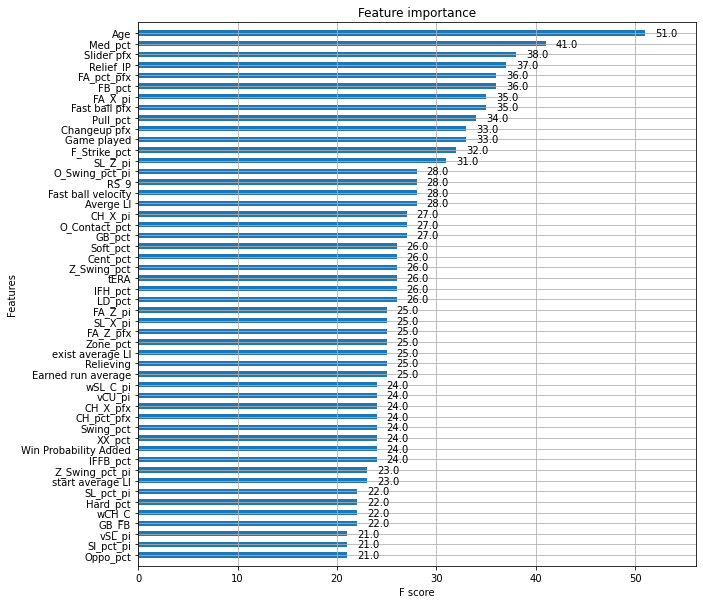

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.5, ax=ax,importance_type='weight')
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


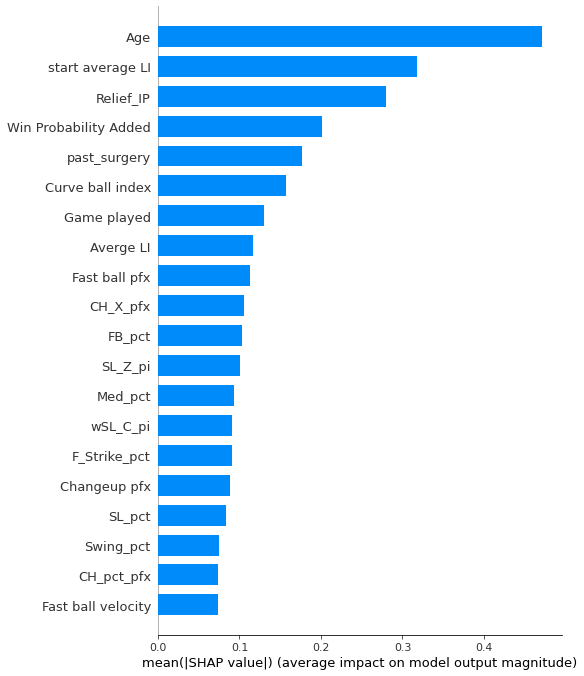

In [ ]:
import shap
shap_values = shap.TreeExplainer(xgb_model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

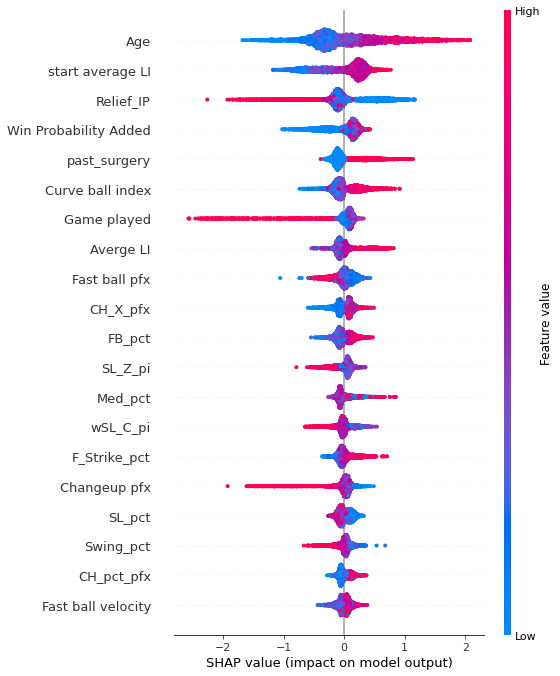

In [ ]:
shap.summary_plot(shap_values, X_train)

## Feature selection 

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
df[["TBF"]] = preprocessing.StandardScaler().fit_transform(df[['TBF']].values)
df[['SO']] = preprocessing.StandardScaler().fit_transform(df[['SO']].values)

In [ ]:
df1=df[["Season","injured","Age","inLI","pos_WPA","CU_X_pi","G","FBv","Pulls","pLI","vFC_pfx","GS","K_pct","exLI","wCH_C_pfx","Contact_pct","SL_X_pfx","O_Contact_pct","SF_pct","FA_X_pfx","past_surgery","ERA","TBF","SO"]]
df1=df1.rename(columns={"inLI":"start average LI","pos_WPA":"Win Probability Added","G":"Game played","FBv":"Fast ball velocity","Pulls":"Pull hitter","pLI":"Averge LI","vFC_pfx":"Cutter","GS":"Game started","TBF":"Total Batters Faced","K_pct":"Strikeout percentage","exLI":"exist average LI","ERA":"Earned run average","SF_pct":"sacrifice fly percentage","Contact_pct":"Contact Rate","CU_X_pi":"Curve ball index","SL_X_pfx":"Slider pfx","wCH_C_pfx":"Changeup pfx","SO":"Strikeouts counts","FA_X_pfx":"Fast ball pfx"})

## Split

In [ ]:
### select features that have high importance level 
#split dataset with train,test,validation set based on Seasons
train = df1[df1['Season'] <= 2019]
validation= df1[(df1["Season"] == 2020)]
test= df1[df1["Season"]==2021]
#define X and Y
X_train=train.drop(['injured',"Season"], axis = 1)
X_test=test.drop(['injured',"Season"], axis = 1)
X_vali=validation.drop(['injured',"Season"], axis = 1)
Y_train=train['injured']
Y_test=test['injured']
Y_vali=validation['injured']

1    3979
0    2686
Name: injured, dtype: int64

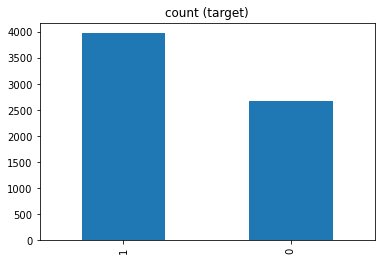

In [ ]:
train.injured.value_counts().plot(kind='bar', title='count (target)')
train.injured.value_counts()

## Before SMOTE

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier()
randomforest_model.fit(X_train, Y_train)
predictions = randomforest_model.predict(X_vali)
actuals = Y_vali
print("Roc_acu", roc_auc_score(actuals, randomforest_model.predict_proba(X_vali)[:, 1]))




from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(max_iter=5000)
LR_model.fit(X_train, Y_train)
predictions = LR_model.predict(X_vali)
actuals = Y_vali
print("Roc_auc", roc_auc_score(actuals, LR_model.predict_proba(X_vali)[:, 1]))




from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = XGBClassifier().fit(X_train, Y_train)
predictions = xgb_model.predict(X_vali)
actuals = Y_vali
print("Roc_auc", roc_auc_score(actuals, xgb_model.predict_proba(X_vali)[:, 1]))



from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC, SVC
svm=SVC(probability=True)
svm_model = svm.fit(X_train, Y_train)
predictions = svm_model.predict(X_vali)
actuals = Y_vali
print("Roc_auc", roc_auc_score(actuals, svm_model.predict_proba(X_vali)[:, 1]))




Roc_acu 0.6131385696040869
Roc_auc 0.6844508301404852
Roc_auc 0.6217592592592592
Roc_auc 0.5717432950191571


In [ ]:
!pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
# import library
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_train, y_train = smote.fit_resample(X_train, Y_train.ravel())
print('Original dataset shape', Counter(Y_train))
print('Resample dataset shape', Counter(y_train))

Original dataset shape Counter({1: 3979, 0: 2686})
Resample dataset shape Counter({1: 3979, 0: 3979})


# Models

## Random Forest

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

randomforest_model = RandomForestClassifier()
randomforest_model.fit(x_train, y_train)

predictions = randomforest_model.predict(X_vali)

actuals = Y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, randomforest_model.predict_proba(X_vali)[:, 1]))

[[136  80]
 [127 163]]
accuracy_score: 0.5909090909090909
Precision_score: 0.6707818930041153
F1_score: 0.6116322701688556
Roc_acu 0.599720625798212


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(max_iter=5000)
LR_model.fit(x_train, y_train)

predictions = LR_model.predict(X_vali)

actuals = Y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, LR_model.predict_proba(X_vali)[:, 1]))

[[111 105]
 [ 71 219]]
accuracy_score: 0.6521739130434783
Precision_score: 0.6759259259259259
F1_score: 0.7133550488599348
Roc_acu 0.6928799489144316


## XGBoost

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

xgb_model = XGBClassifier().fit(x_train, y_train)

predictions = xgb_model.predict(X_vali)

actuals = Y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, xgb_model.predict_proba(X_vali)[:, 1]))

[[122  94]
 [ 93 197]]
accuracy_score: 0.6304347826086957
Precision_score: 0.6769759450171822
F1_score: 0.6781411359724613
Roc_acu 0.6378671775223499


<AxesSubplot:>

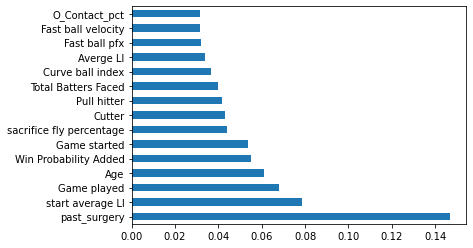

In [ ]:
feat_importances = pd.Series(xgb_model.feature_importances_, index= x_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

## SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC, SVC
svm=SVC(probability=True)

svm_model = svm.fit(x_train, y_train)
predictions = svm_model.predict(X_vali)

actuals = Y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, svm_model.predict_proba(X_vali)[:, 1]))

[[131  85]
 [148 142]]
accuracy_score: 0.5395256916996047
Precision_score: 0.6255506607929515
F1_score: 0.5493230174081238
Roc_acu 0.5918263090676883


## Ensembling

In [ ]:
import pickle

In [ ]:
pickle.dump(randomforest_model, open('randomforest_model.pkl', 'wb'))
pickle.dump(LR_model, open('LR_model.pkl', 'wb'))
pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))
pickle.dump(svm_model, open('svm_model.pkl', 'wb'))

model_names = ["randomforest_model", "LR_model", "xgb_model", "svm_model"]

for model in model_names:
    with open(f"{model}.pkl", "rb") as pfile:
        exec(f"{model} = pickle.load(pfile)")

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [ ]:
for model in model_names:
    curr_model = eval(model)
    print(f'{model} score: {roc_auc_score(Y_vali, curr_model.predict_proba(X_vali)[:, 1])}')

randomforest_model score: 0.599720625798212
LR_model score: 0.6928799489144316
xgb_model score: 0.6378671775223499
svm_model score: 0.5918263090676883


## Parameter tunning

In [ ]:
import numpy as np 
parameters_for_testing = {
    'min_child_weight':[0.0001,0.001,0.01,0.1],
    'learning_rate':[0.00001,0.0001,0.001],
    'n_estimators':[1,2,3,5,10],
    'subsample':np.linspace(0.7,0.9,20),
    'max_depth':[2,3,4,5],
    'colsample_bytree':np.linspace(0.5,0.98,10),
}
# Parameter tuning using 7 features
xgb_model = XGBClassifier()

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, scoring='roc_auc')
gsearch1.fit(x_train,y_train)

print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

best params
{'colsample_bytree': 0.5, 'learning_rate': 1e-05, 'max_depth': 5, 'min_child_weight': 0.0001, 'n_estimators': 2, 'subsample': 0.868421052631579}
best score
0.7233035609211317


In [ ]:
gsearch1

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                         'learning_rate': [1e-05, 0.0001, 0.001],
                         'max_depth': [2, 3, 4, 5],
                         'min_child_weight': [0.0001, 0.001, 0.01, 0.1],
                         'n_estimators': [1, 2, 3, 5, 10],
          

In [ ]:
predictions=gsearch1.predict(X_test)
actuals = Y_test
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_auc", roc_auc_score(actuals, gsearch1.predict_proba(X_test)[:, 1]))

accuracy_score: 0.655367231638418
Precision_score: 0.7753846153846153
F1_score: 0.7336244541484715
Roc_auc 0.664430023864788


In [ ]:
xgb_model_parameter = XGBClassifier(
        objective= 'binary:logistic',
        colsample_bytree = 0.7666666666666666,
        learning_rate = 0.001,
        max_depth = 5,
        min_child_weight = 0.0001,
        n_estimators = 10,
        subsample = 0.7105263157894737)

xgb_model_parameter.fit(x_train, y_train)

predictions = xgb_model_parameter.predict(X_test)
actuals = Y_test

print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_auc", roc_auc_score(actuals, xgb_model_parameter.predict_proba(X_test)[:, 1]))

accuracy_score: 0.6713747645951036
Precision_score: 0.7674750356633381
F1_score: 0.7550877192982457
Roc_auc 0.6762439112099121


## final results(ROC)

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_classifer = VotingClassifier(estimators= model_list, voting='soft', n_jobs=-1)
voting_classifer.fit(x_train, y_train)

Trying to unpickle estimator LogisticRegression from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator DecisionTreeClassifier from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator RandomForestClassifier from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator SVC from version 1.1.3 when using version 1.0.2. This might lead t

VotingClassifier(estimators=[('randomforest_model', RandomForestClassifier()),
                             ('LR_model', LogisticRegression(max_iter=5000)),
                             ('xgb_model',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=...
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_bin=256, max_cat_threshold=64,
             

In [ ]:
y_pred = voting_classifer.predict(X_vali)
roc_auc_score(Y_vali, y_pred)

0.6216155810983397

In [ ]:
from sklearn.metrics import roc_curve
rfpr,rtpr, thresholds = roc_curve(Y_test, randomforest_model.predict_proba(X_test)[:,1])
lfpr,ltpr, thresholds = roc_curve(Y_test, LR_model.predict_proba(X_test)[:,1])
xfpr,xtpr, thresholds = roc_curve(Y_test, xgb_model_parameter.predict_proba(X_test)[:,1])
sfpr,stpr, thresholds = roc_curve(Y_test, svm_model.predict_proba(X_test)[:,1])
efpr,etpr, thresholds = roc_curve(Y_test, voting_classifer.predict_proba(X_test)[:,1])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argumen

LR ROC AUC score =  0.6819179280133382
XGBoost ROC AUC score =  0.6762439112099121
RF ROC AUC score =  0.6813826048579553
SVM ROC AUC score =  0.677324773611429
Ensembled ROC AUC score =  0.6960079603779136


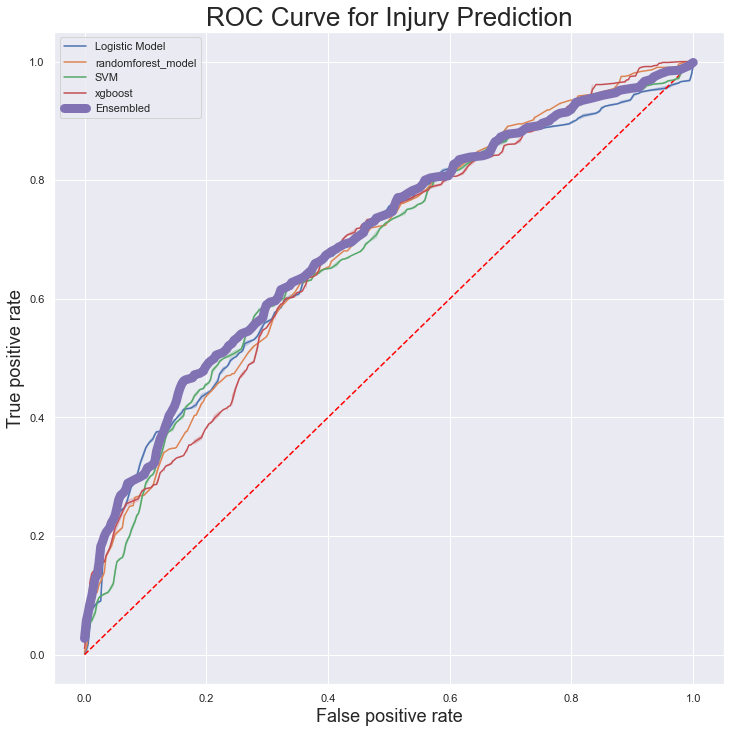

In [ ]:
sns.set(rc={"lines.linewidth": 1.5})

fig, ax = plt.subplots(figsize=[12,12])


sns.lineplot(lfpr, ltpr, label="Logistic Model")
plt.plot([0,1],[0,1],c='red',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

sns.lineplot(rfpr, rtpr, label="randomforest_model")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

sns.lineplot(sfpr, stpr, label="SVM")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

sns.lineplot(xfpr, xtpr, label="xgboost")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

sns.lineplot(efpr, etpr, linewidth= 9.0, label="Ensembled")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate', fontsize=18)
plt.ylabel('True positive rate', fontsize=18)
plt.title('ROC Curve for Injury Prediction', fontsize=26);
print("LR ROC AUC score = ", roc_auc_score(Y_test, LR_model.predict_proba(X_test)[:,1]))
print("XGBoost ROC AUC score = ", roc_auc_score(Y_test, xgb_model_parameter.predict_proba(X_test)[:,1]))
print("RF ROC AUC score = ", roc_auc_score(Y_test, randomforest_model.predict_proba(X_test)[:,1]))
print("SVM ROC AUC score = ", roc_auc_score(Y_test, svm_model.predict_proba(X_test)[:,1]))
print("Ensembled ROC AUC score = ", roc_auc_score(Y_test, voting_classifer.predict_proba(X_test)[:,1]))


plt.savefig('ROC.jpg')